In [1]:
import time
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import ipympl
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import QuantileTransformer

from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid

plt.rcParams["axes.grid"] = True

D:\Anaconda3\envs\jenv\lib\site-packages\ipympl\__init__.py:19: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "D:\Anaconda3\envs\jenv\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda3\envs\jenv\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda3\envs\jenv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda3\envs\jenv\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda3\envs\jenv\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\Anaconda3\envs\jenv\lib\site-packages\tornado\platform\asynci

In [2]:
df = pd.read_csv('data.csv', index_col=None, sep=",")
df

,name,followers,followings,follow ratio,muters,reputation,effective sp,own sp,sp ratio,curation_rewards,posting_rewards,witnesses_voted_for,posts,average_post_len,comments,average_comment_len,comments_with_link_ratio,posts_to_comments_ratio,class
0,kasperx1,140,0,0.000000,0,25.000000,1.505732e+01,0.100383,149.999379,0.000,0.000,0,2,308,0,0,0.000000,0.000000,0
1,sutanci,116,43,0.370690,0,44.734189,5.837715e+00,4.834363,1.207546,0.004,9.369,0,0,0,0,0,0.000000,0.000000,0
2,saqib55,204,8,0.039216,0,9.796062,1.501567e+01,0.839601,17.884289,0.000,1.469,0,20,1408,2,6,0.000000,10.000000,0
3,vojtex,357,163,0.456583,4,50.456741,3.792834e+01,37.928338,1.000000,0.099,45.681,30,298,1657,664,103,0.033133,0.448795,0
4,jaff8,1295,27,0.020849,9,64.664156,2.700845e+03,2800.938627,0.964264,257.115,2344.322,18,5,3650,354,215,0.000000,0.014124,0
5,arabson1990,332,53,0.159639,1,54.499360,1.551658e+02,155.165772,1.000000,9.703,149.526,10,29,7273,131,140,0.099237,0.221374,0
6,sensorycznyswiat,49,18,0.367347,0,43.176154,1.510452e+01,14.065452,1.073874,0.032,8.606,0,1,6259,0,0,0.000000,0.000000,0
7,lukasjanik,21,3,0.142857,0,25.000000,5.025578e+00,0.506592,9.920361,0.000,0.031,0,0,0,0,0,0.000000,0.000000,0
8,koltci,570,72,0.126316,2,56.513021,5.051878e+02,505.187754,1.000000,8.698,333.860,0,30,1889,480,340,0.029167,0.062500,0
9,cabernet,616,72,0.116883,1,53.511420,3.163164e+02,330.973449,0.955715,33.902,143.203,6,2,1264,9,56,0.000000,0.222222,0


In [3]:
columns = ['followers', 'followings', 'follow ratio', 'muters',
           'reputation', 'effective sp', 'own sp', 'sp ratio', 'curation_rewards',
          'posting_rewards', 'witnesses_voted_for', 'posts', 'average_post_len', 'comments',
          'average_comment_len', 'comments_with_link_ratio', 'posts_to_comments_ratio']

In [4]:
df1 = df[df['followings'] < 4000]
df1 = df1[df1['followers'] < 4000]
df1 = df1[df1['muters'] < 20]
df1 = df1[df1['sp ratio'] < 200]
df1 = df1[df1['follow ratio'] < 3]
df1 = df1[df1['posting_rewards'] < 2000]
df1 = df1[df1['curation_rewards'] < 150]
df1 = df1[df1['posts'] < 400]
df1 = df1[df1['comments'] < 8000]
df1 = df1[df1['average_post_len'] < 6000]
df1 = df1[df1['average_comment_len'] < 500]
df1 = df1[df1['posts_to_comments_ratio'] < 10]

def color(r, g, b):
    return (r/255, g/255, b/255)

def label(c):
    return Line2D([0],[0], linestyle="none", c=c, marker = 'o')

def scatter_plot_3d(d, x, y, z):
    fig = plt.figure(figsize=(7, 7))
    ax = Axes3D(fig)
    ax.scatter(d[x], d[y], d[z], c=d['class'], cmap=plt.cm.Accent, edgecolor='k', s=80)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.legend([label(color(150, 210, 150)), label(color(247, 192, 135)),
               label(color(235, 8, 144)), label(color(102, 102, 102))],
              ['content-creator', 'scammer', 'comment-spammer', 'bid-bot'], numpoints = 1)

<IPython.core.display.Javascript object>


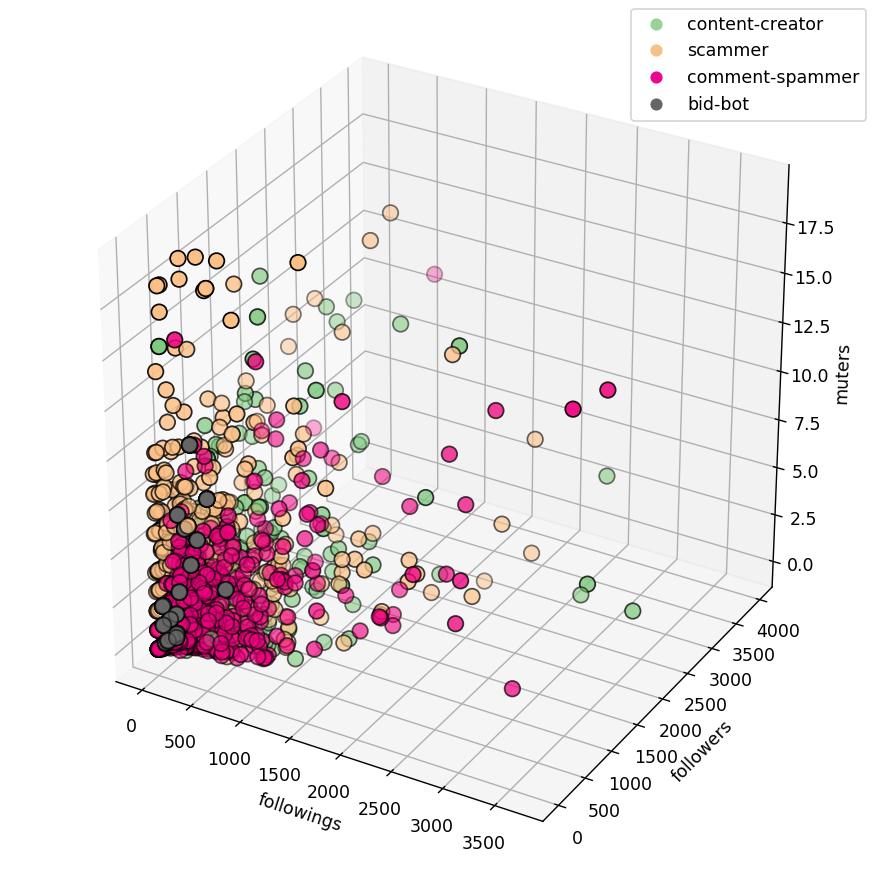

In [5]:
scatter_plot_3d(df1, 'followings', 'followers', 'muters')

<IPython.core.display.Javascript object>


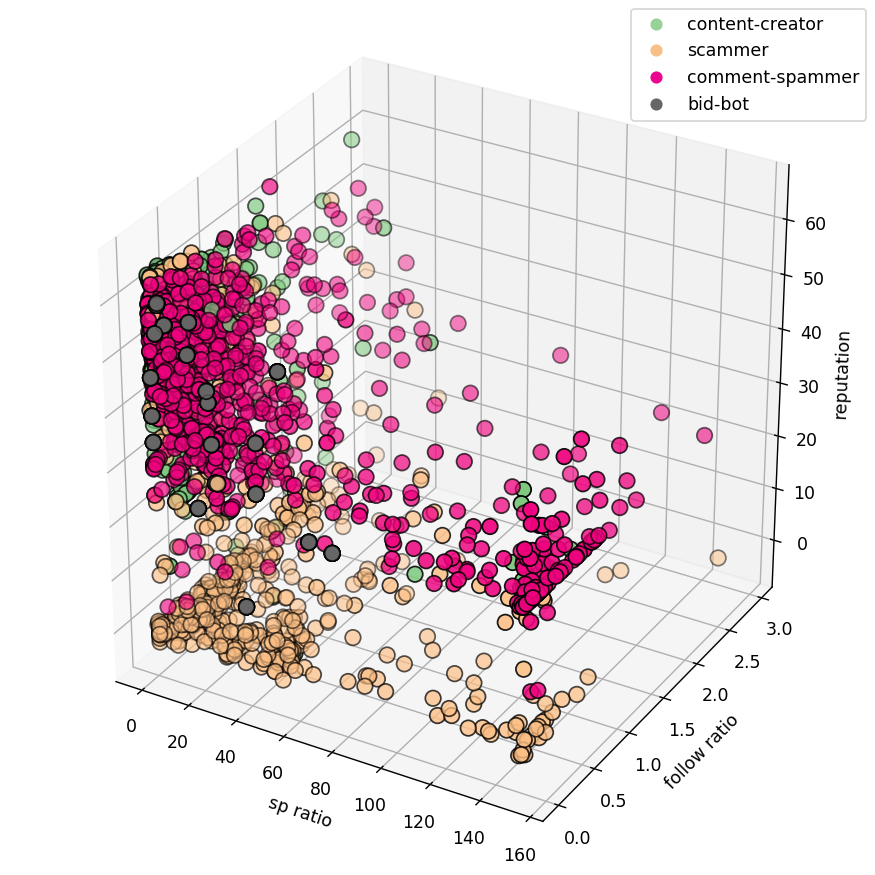

In [6]:
scatter_plot_3d(df1, 'sp ratio', 'follow ratio', 'reputation')

<IPython.core.display.Javascript object>


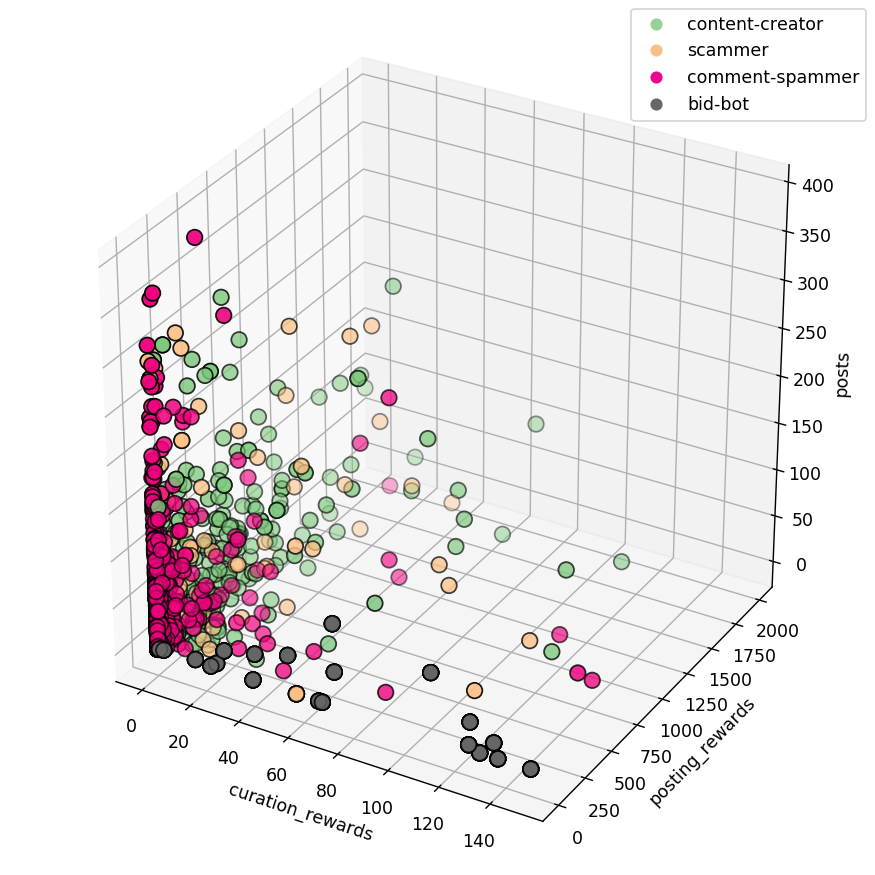

In [7]:
scatter_plot_3d(df1, 'curation_rewards', 'posting_rewards', 'posts')

<IPython.core.display.Javascript object>


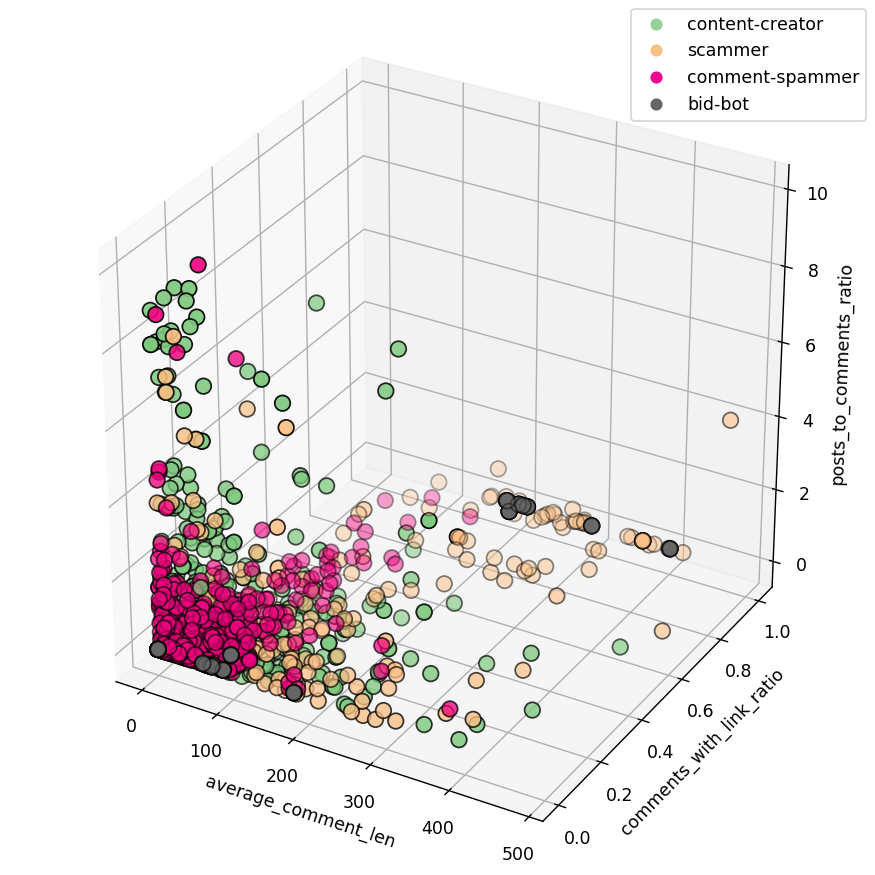

In [8]:
scatter_plot_3d(df1, 'average_comment_len', 'comments_with_link_ratio', 'posts_to_comments_ratio')

In [9]:
class_names = ['content-creator', 'scammer', 'comment-spammer', 'bid-bot']

def plot_confusion_matrix(cm):
    plt.figure(figsize = (8, 8))
    sns.heatmap(cm,
                annot=True,
                cmap="Blues",
                xticklabels=class_names,
                yticklabels=class_names,
                fmt = '0.0f')

   DecisionTreeClassifier - accuracy: 0.956, execution time: 0.024 ms


<IPython.core.display.Javascript object>


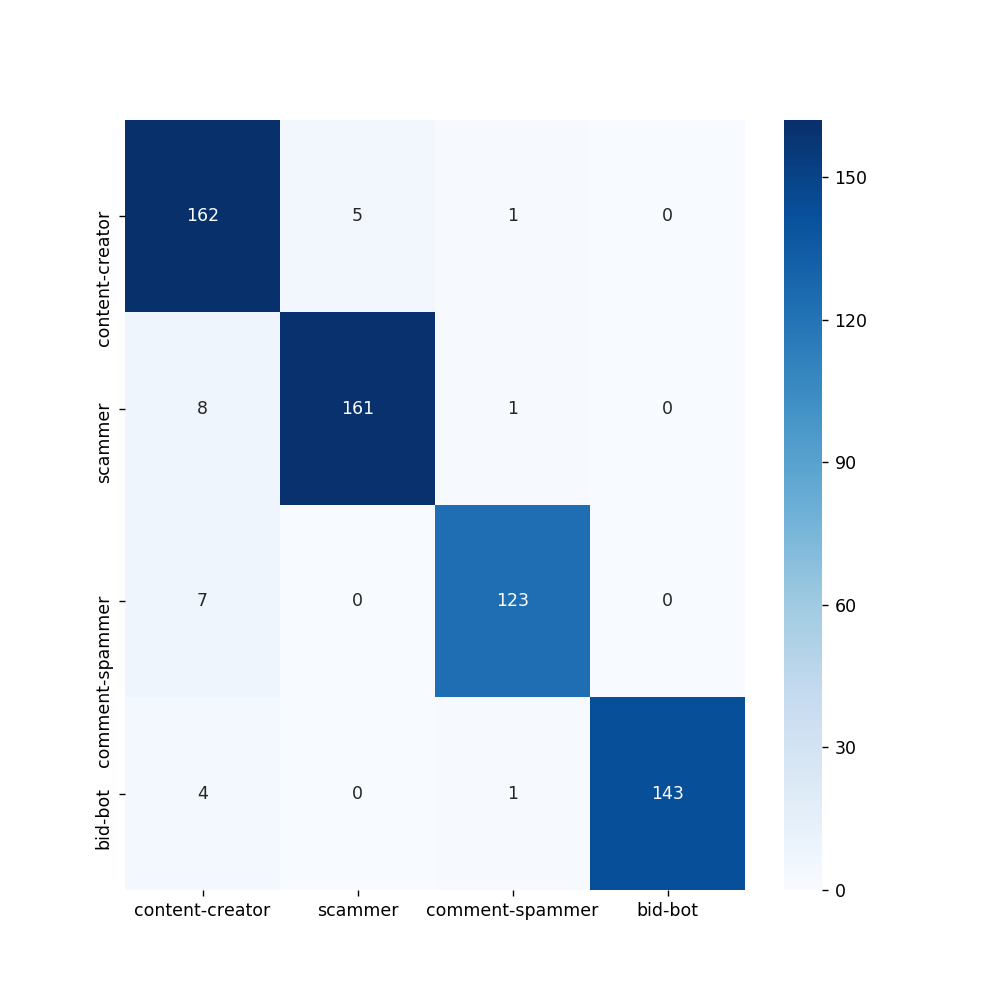

              BernoulliNB - accuracy: 0.508, execution time: 0.004 ms


<IPython.core.display.Javascript object>


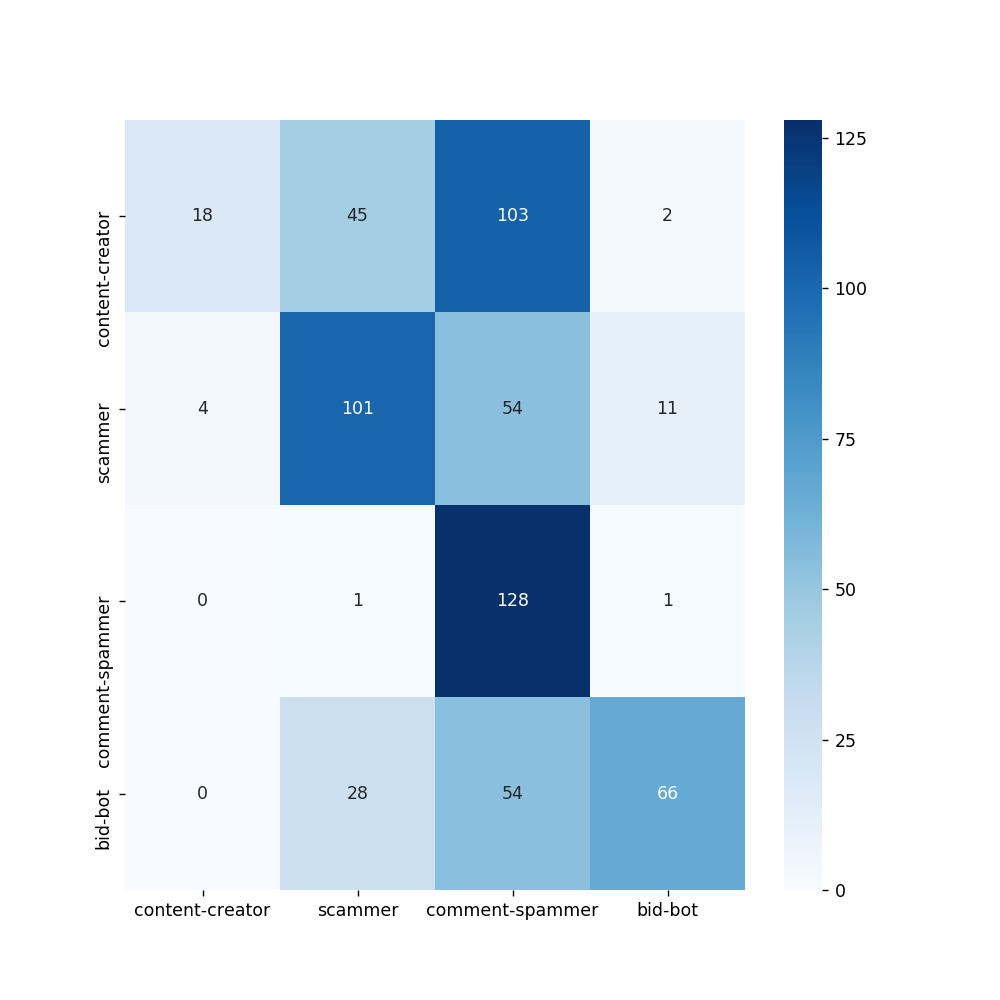

               GaussianNB - accuracy: 0.360, execution time: 0.004 ms


<IPython.core.display.Javascript object>


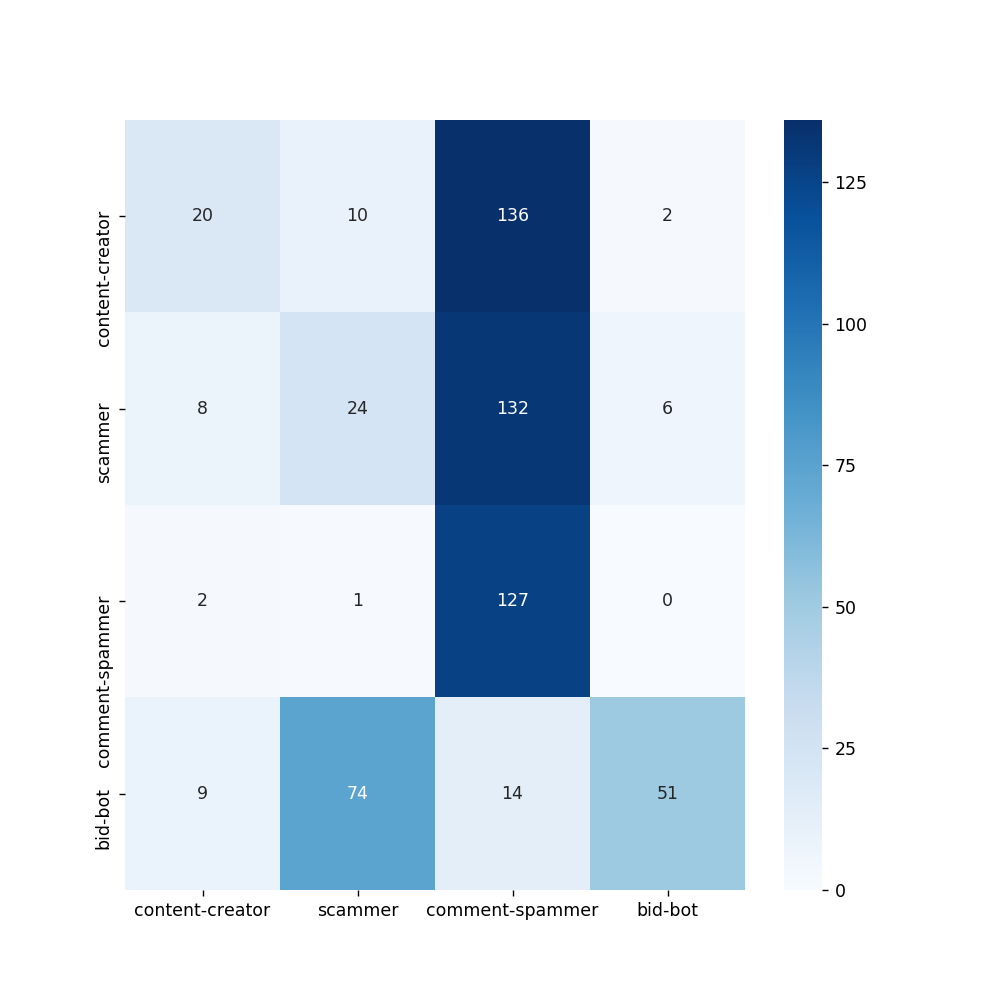

     KNeighborsClassifier - accuracy: 0.794, execution time: 0.010 ms


<IPython.core.display.Javascript object>


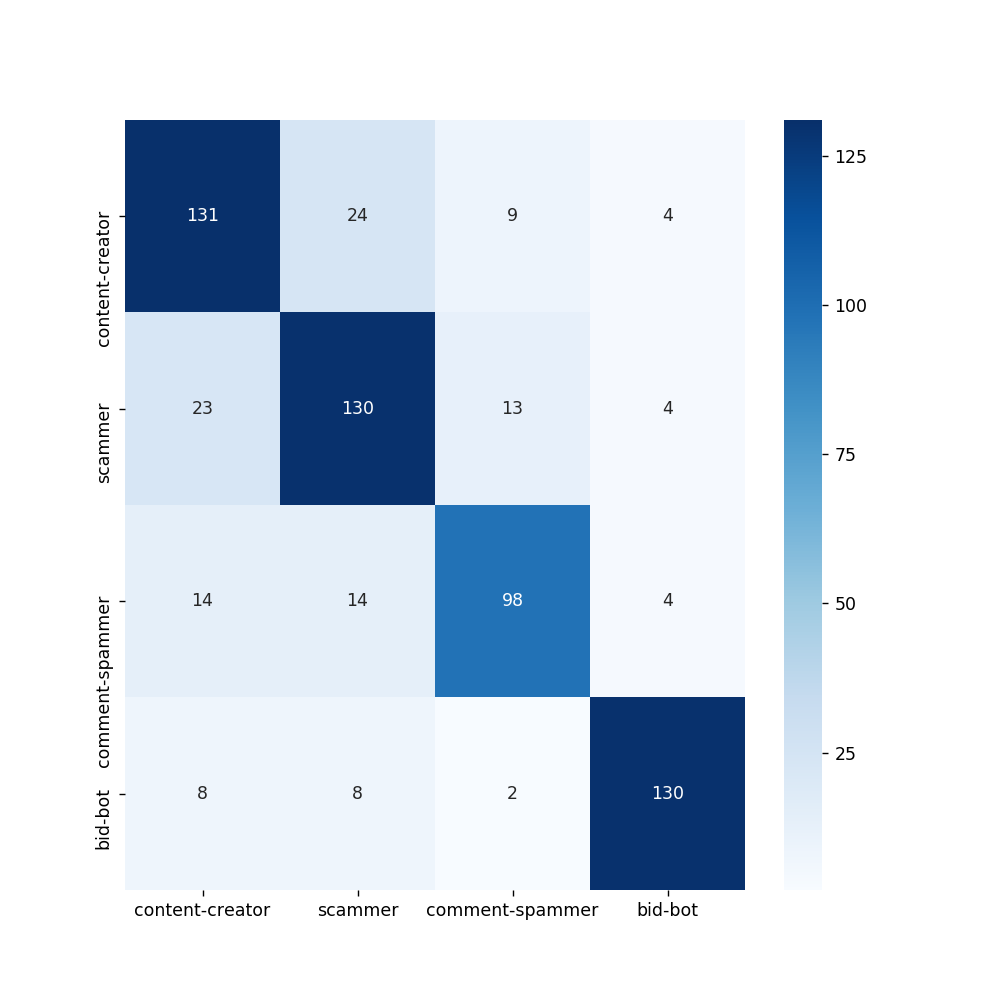

          NearestCentroid - accuracy: 0.268, execution time: 0.002 ms


<IPython.core.display.Javascript object>


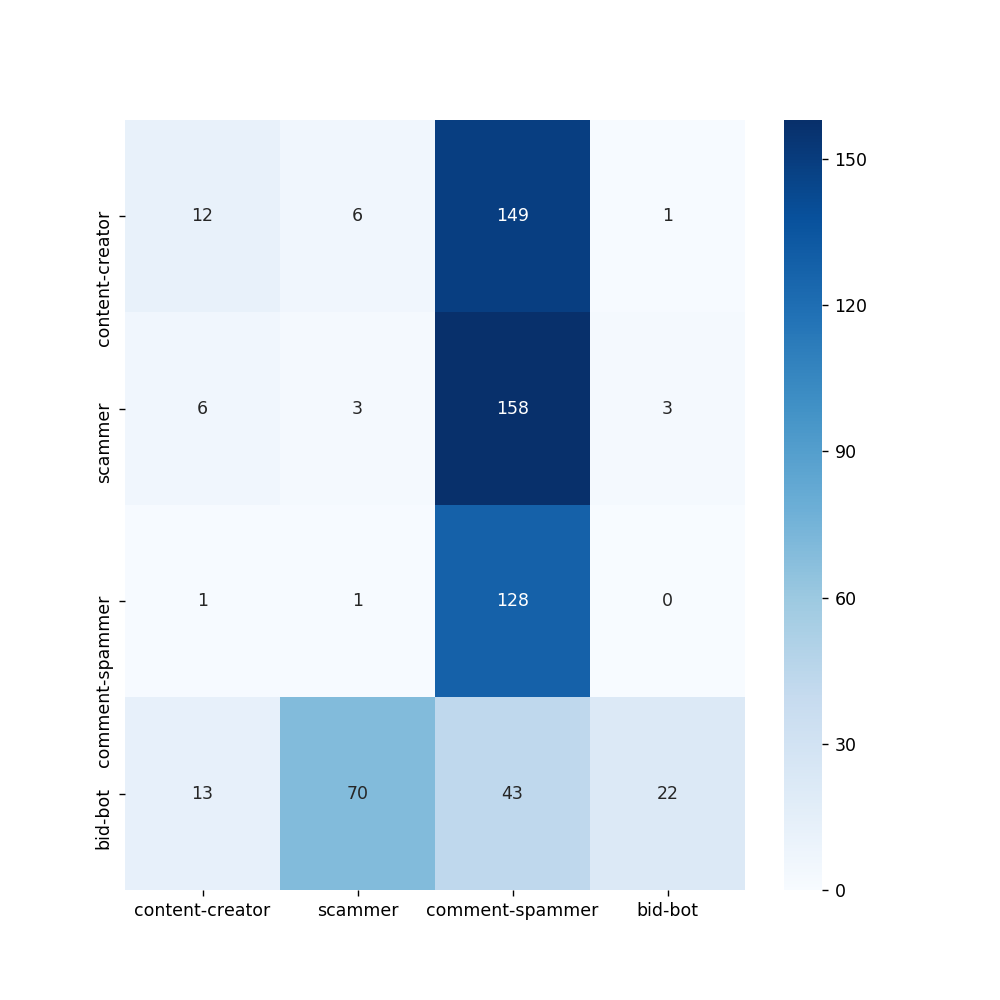

                LinearSVC - accuracy: 0.589, execution time: 1.084 ms


<IPython.core.display.Javascript object>


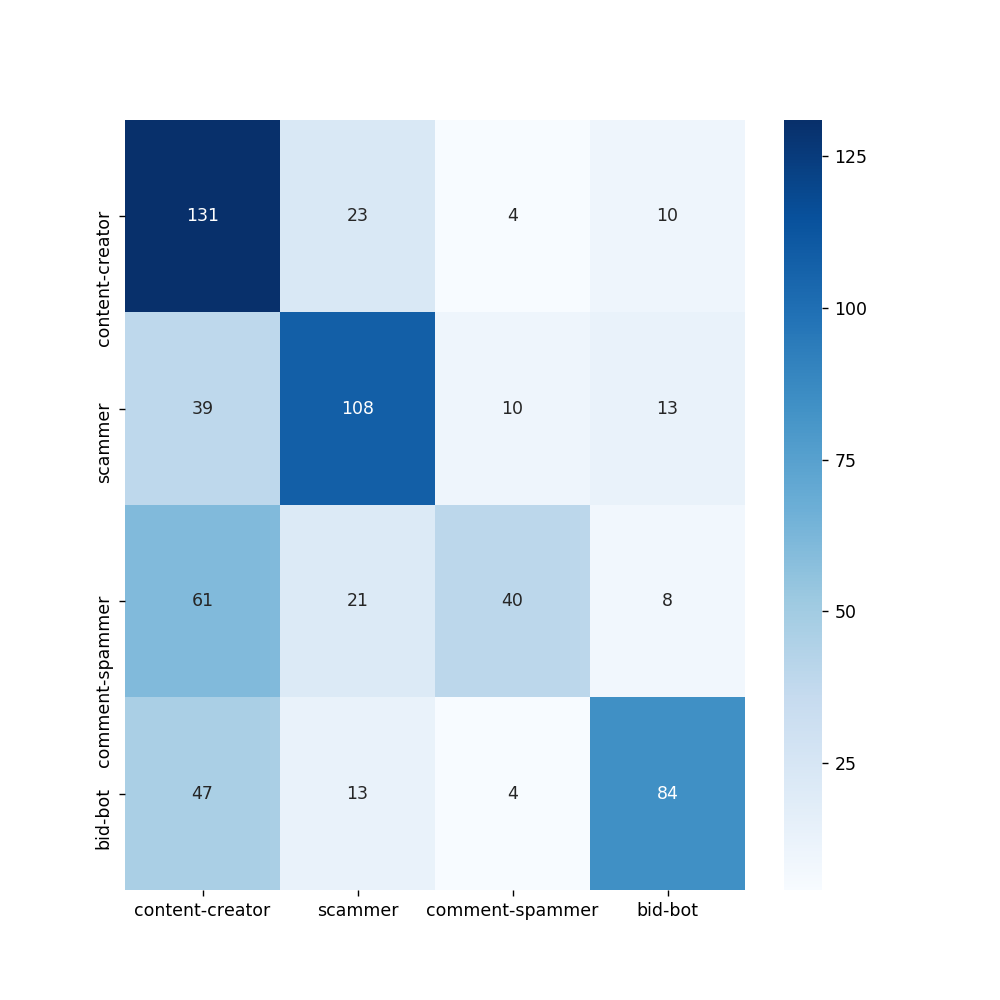

In [10]:
X_cols = columns
y_cols = ['class']
X = df[X_cols]
y = df[y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

for clf_name, clf in [
    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=8)),
    ('BernoulliNB', BernoulliNB()),
    ('GaussianNB', GaussianNB()),
    ('KNeighborsClassifier', KNeighborsClassifier()),   
    ('NearestCentroid', NearestCentroid()),
    ('LinearSVC', LinearSVC())]:
    
    start = time.time()
    clf.fit(X_train, y_train)
    score = clf.fit(X_test, y_test)
    y_pred = clf.predict(X_test)
    end = time.time()
    print('%25s - accuracy: %.3f, execution time: %.3f ms' % 
          (clf_name, accuracy_score(y_pred, y_test), end - start))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)